<a href="https://colab.research.google.com/github/ZeroAthena/SimMat02025/blob/main/Tarea_1_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea - Ajuste de curvas

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt

---
### Problema 1

Los siguientes datos representan el costo en dólares de la electricidad según Western Electricity Coordinating Council desde el 2014 (y su pronóstico para el 2040)

Tomado de:
https://www.quandl.com/data/EIA/AEO_2016_REF_NO_CPP_PRCE_NA_COMM_NA_ELC_NA_WECCRKS_NCNTPKWH_A-Electricity-End-Use-Prices-Commercial-Western-Electricity-Coordinating-Council-Rockies-No-CPP-AEO2016

In [3]:
# Datos extraidos de la página de quandl
data = np.array([10.051101,  9.259127,  9.444813,  9.557723,  9.977324, 10.298326,
       10.447217, 10.550506, 10.590784, 10.657418, 10.743085, 10.831965,
       10.988435, 11.153055, 11.313326, 11.557165, 11.860136, 12.122511,
       12.356448, 12.611391, 12.814569, 13.111372, 13.357134, 13.559012,
       13.85861 , 14.135924, 14.436149])

1. Ajuste estos datos a polinomios de grado 1 hasta 3 (los datos en $x$ corresponden a los años de 2014 a 2040, sin embargo son valores muy grandes para elevarlos a una potencia, use una representación para estos años, por ejemplo $2014 \rightarrow 0$ y $2040\rightarrow 27$).

2. Muestre las tres curvas ajustadas junto a los datos de los costos en un solo gráfico

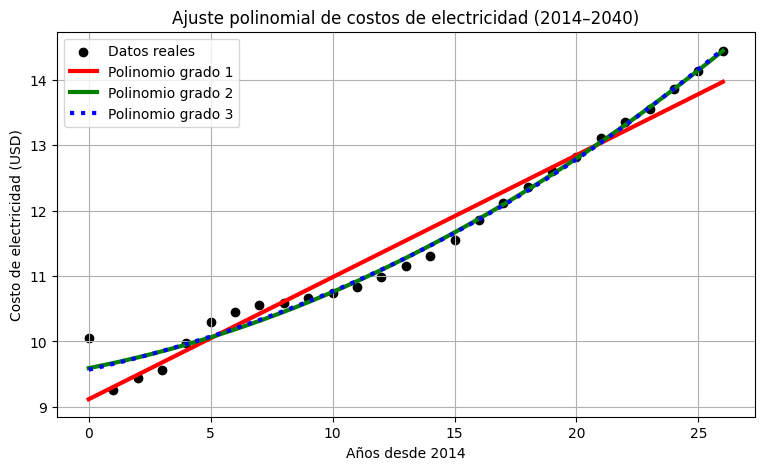

Grado 1: [9.11567636 0.18667055]
Grado 2: [9.59128645e+00 7.25241276e-02 4.39024722e-03]
Grado 3: [9.56752298e+00 8.46495787e-02 3.20207503e-03 3.04659522e-05]


In [7]:
#Escala de la gráfica
x=np.arange(len(data)) #Lista
y=data

#Funciones requeridas
def fhat(beta,x):
    X=np.array([x**i for i in range(len(beta))]).T
    return X@beta

def error_modelo(beta,x,y):
    return np.sum((y-fhat(beta,x))**2)

#Condiciones de búsqueda
grados=[1,2,3]
betas=[]

#Búsqueda de coeficientes
for grado in grados:
    beta_ini=np.random.rand(grado+1)
    sol=opt.minimize(error_modelo,beta_ini,args=(x,y))
    betas.append(sol.x)

#Configuración de gráfica
x_pred=np.linspace(0,26,200)
y_pred=[fhat(b,x_pred) for b in betas]

#Gráfica
plt.figure(figsize=(9,5))
plt.scatter(x,y,color='black',label='Datos reales')
estilos=["r-","g-","b:"]
for i in range(len(grados)):
    plt.plot(x_pred, y_pred[i],estilos[i], lw=3, label=f'Polinomio grado {grados[i]}')

plt.xlabel("Años desde 2014")
plt.ylabel("Costo de electricidad (USD)")
plt.title("Ajuste polinomial de costos de electricidad (2014–2040)")
plt.legend()
plt.grid()
plt.show()

#Coeficientes de cada grado
for i in range(len(betas)):
  print("Grado "+str(i+1)+":",betas[i])


**Resultados**

Función de grado 1 - $f(x)=9.11+0.19x$

Función de grado 2 - $f(x)=9.59+0.0725x+0.00439x^2$

Función de grado 3 - $f(x)=9.58+0.0847x+0.00319x^2+0.0000307x^3$

Las funciones de grado 2 y 3 son similiares en la gráfica porque sus coeficientes son parecidos y el último coeficiente de la función de grado 3 tiene una tendencia a $0$, por lo que su influencia es muy baja.

---

___
### Problema 2

El archivo `population_data.csv` contiene información histórica anual de México relativa a la población, nacimientos y muertes desde el año 1950 hasta el año 2015. La primer columna corresponde a los años, la segunda a la población, la tercera a los nacimientos y la última a los decesos.

Tomado de: https://en.wikipedia.org/wiki/Demographics_of_Mexico.

Importe estos datos usando la función `read_csv` del paquete `pandas`

1. Usando los años como variable independiente $x$ y la población como variable dependiente $y$, ajustar polinomios de grado 1 hasta grado 3.

    * Mostrar en un solo gráfico los datos de población contra los años, y los polinomios ajustados.

    * Graficar el error cuadrático acumulado contra el número de términos.

2. Repetir el punto 1 usando los nacimientos como variable dependiente $y$. Grafique las curvas ajustadas junto con los datos de nacimientos. Vea en un gráfico el error acumulado.

In [83]:
data = pd.read_csv('/content/drive/MyDrive/Iteso/Simulación matemática/SimMat02025/population_data.csv')

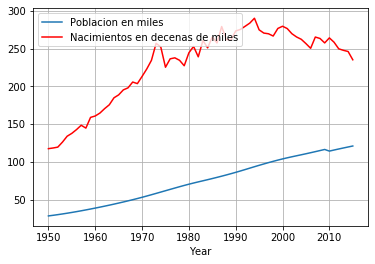

In [ ]:
# Se muestra la gráfica. Vea como los datos son escalados, esto le ayudará en el cálculo
# de la regresión.

plt.plot(data.values[:,0],data.values[:,1]/1000,label=data.columns[1]+' en miles')
plt.plot(data.values[:,0],data.values[:,2]/10000,'r',label=data.columns[2]+' en decenas de miles')
plt.legend(loc=2)
plt.xlabel(data.columns[0])
plt.grid()

---

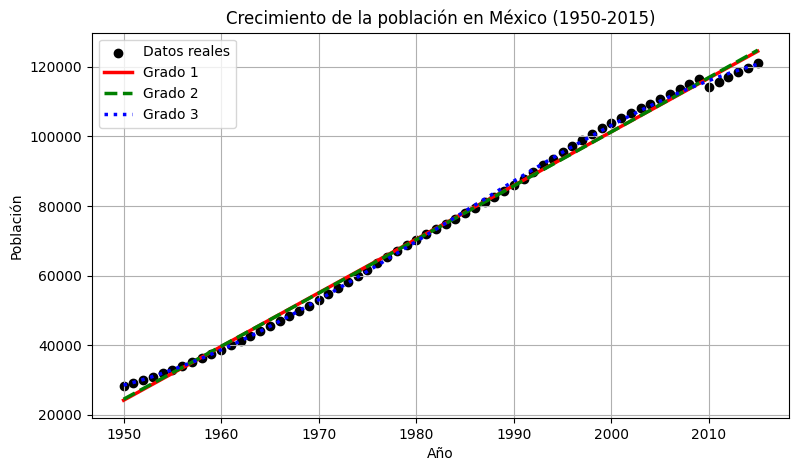

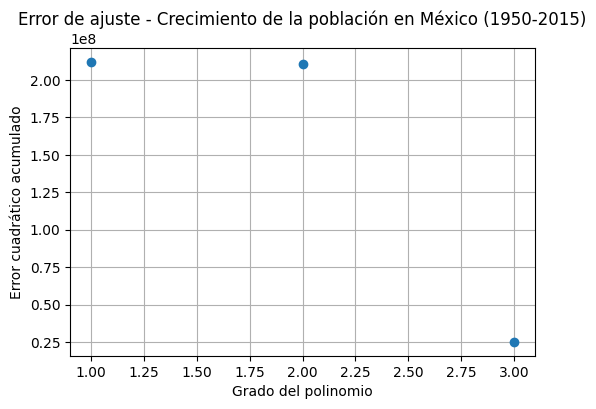

Grado 1: [24138.01988306  1543.97331496]
Grado 2: [2.44256115e+04 1.51701206e+03 4.14786203e-01]
Grado 3: [ 2.84777617e+04  7.39078546e+02  3.05648916e+01 -3.09232046e-01]


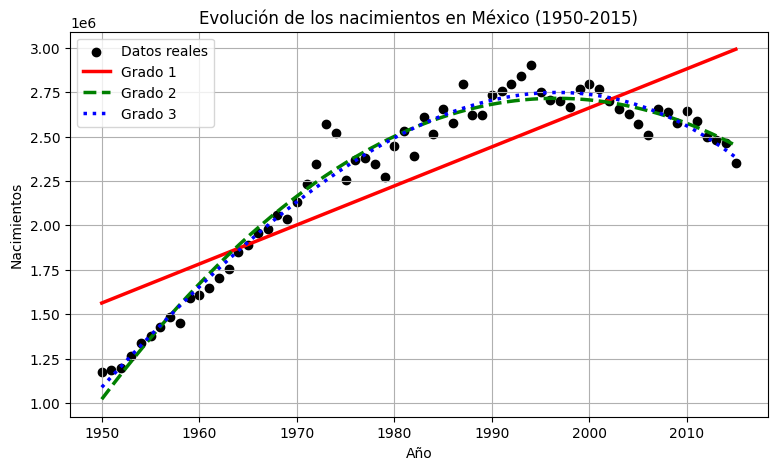

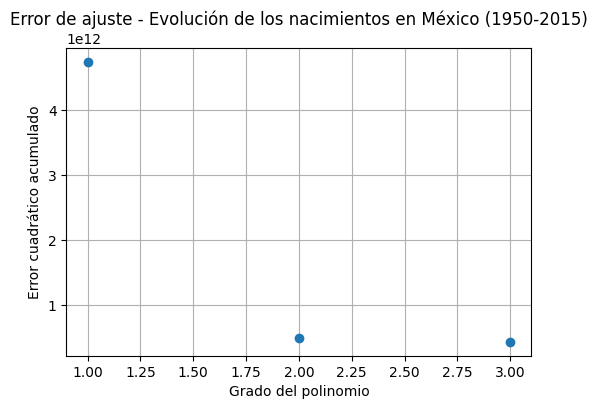

Grado 1: [1562612.95639047   21985.11234814]
Grado 2: [ 1.02101460e+06  7.27833472e+04 -7.81626360e+02]
Grado 3: [ 1.08831999e+06  5.98707799e+04 -2.81282600e+02 -5.13136073e+00]


In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt

#Variables
x = data.values[:, 0]
x_centrado = x - x[0]   #Centrar los años para que sea 1,2,3,4,…,n
y_poblacion = data.values[:, 1]
y_nacimientos = data.values[:, 2]

#Funciones requeridas
def fhat(beta, x):
    X = np.array([x**i for i in range(len(beta))]).T
    return X @ beta

def error_modelo(beta, x, y):
    return np.sum((y - fhat(beta, x))**2)

#Ajuste de polinomios (grado 1 a 3)
grados = [1, 2, 3]

def ajustar_y_graficar(x, y, titulo, ylabel):
    betas = []
    errores = []

    for grado in grados:
        beta_ini = np.random.rand(grado + 1)
        sol = opt.minimize(error_modelo, beta_ini, args=(x, y))
        betas.append(sol.x)
        errores.append(error_modelo(sol.x, x, y))

    #Rango de gráfica
    x_pred = np.linspace(x[0], x[-1], 300)
    y_pred = [fhat(b, x_pred) for b in betas]

    #Gráfica de datos + polinomios
    plt.figure(figsize=(9,5))
    plt.scatter(x + 1950, y, color='black', label='Datos reales')  #volver a sumar 1950 solo para la gráfica
    estilos = ["r-", "g--", "b:"]
    for i in range(len(grados)):
        plt.plot(x_pred + 1950, y_pred[i], estilos[i], lw=2.5, label=f'Grado {grados[i]}')
    plt.xlabel("Año")
    plt.ylabel(ylabel)
    plt.title(titulo)
    plt.legend()
    plt.grid()
    plt.show()

    #Gráfica de error cuadrático acumulado
    plt.figure(figsize=(6,4))
    plt.plot(grados, errores, 'o', lw=2)
    plt.xlabel("Grado del polinomio")
    plt.ylabel("Error cuadrático acumulado")
    plt.title(f"Error de ajuste - {titulo}")
    plt.grid()
    plt.show()

    #Mostrar coeficientes
    for i in range(len(betas)):
      print("Grado "+str(i+1)+":",betas[i])

#Graficar para Población
ajustar_y_graficar(x_centrado, y_poblacion, "Crecimiento de la población en México (1950-2015)", "Población")

#Graficar para Nacimientos
ajustar_y_graficar(x_centrado, y_nacimientos, "Evolución de los nacimientos en México (1950-2015)", "Nacimientos")
